# "Pre-lecture" HW

## Question 1

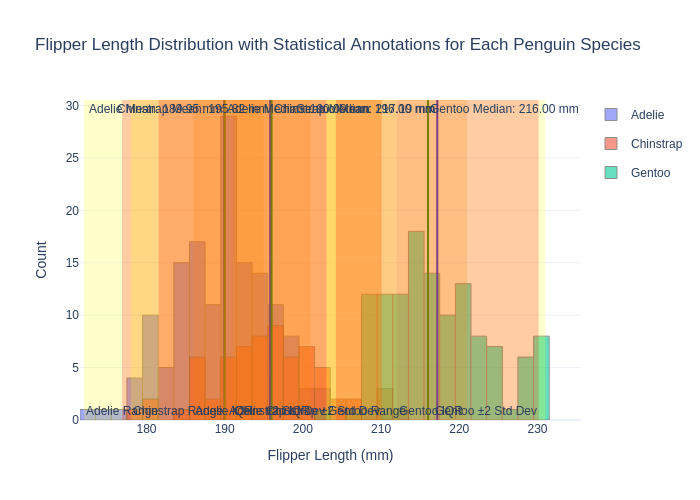

In [40]:
import pandas as pd
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing values in 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Get unique species
species_list = penguins['species'].unique()

# Initialize a Plotly figure
fig = go.Figure()

# Define colors for each statistical annotation
color_mean = 'blue'
color_median = 'green'
color_range = 'yellow'
color_iqr = 'orange'
color_stddev = 'red'

# Loop through each species and create histograms
for species in species_list:
    # Subset data for each species
    species_data = penguins[penguins['species'] == species]
    flipper_lengths = species_data['flipper_length_mm']
    
    # Compute key statistics
    mean_flipper = flipper_lengths.mean()
    median_flipper = flipper_lengths.median()
    min_flipper = flipper_lengths.min()
    max_flipper = flipper_lengths.max()
    std_flipper = flipper_lengths.std()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    
    # Add histogram to the figure
    fig.add_trace(go.Histogram(
        x=flipper_lengths,
        name=species,
        opacity=0.6,
        nbinsx=20,
        marker=dict(line=dict(width=1)),
        legendgroup=species
    ))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper, line=dict(color=color_mean, width=2), 
                  annotation_text=f"{species} Mean: {mean_flipper:.2f} mm", 
                  annotation_position="top left")
    fig.add_vline(x=median_flipper, line=dict(color=color_median, width=2), 
                  annotation_text=f"{species} Median: {median_flipper:.2f} mm", 
                  annotation_position="top right")

    # Add rectangles for range, IQR, and ±2 standard deviations
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor=color_range, opacity=0.2, 
                  line_width=0, annotation_text=f"{species} Range", annotation_position="bottom left")
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color_iqr, opacity=0.2, line_width=0, 
                  annotation_text=f"{species} IQR", annotation_position="bottom left")
    fig.add_vrect(x0=mean_flipper - 2*std_flipper, x1=mean_flipper + 2*std_flipper, 
                  fillcolor=color_stddev, opacity=0.2, line_width=0, 
                  annotation_text=f"{species} ±2 Std Dev", annotation_position="bottom right")

# Update layout for better presentation
fig.update_layout(
    title="Flipper Length Distribution with Statistical Annotations for Each Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',  # Allows histograms to overlay on the same figure
    template="plotly_white"
)

# Show the figure
fig.show(renderer="png")


### Summary of Interactions with ChatGPT

- Plotly Histograms with Statistical Markings (Penguins Dataset):

    - You requested a visualization of the `flipper_length_mm` for each species in the penguins dataset using Plotly histograms.
    - I created a solution that included histograms for each species, with vertical lines marking the mean and median, and shaded regions marking the range, interquartile range (IQR), and a range of ±2 standard deviations from the mean.
    - The key functions used were `fig.add_vline()` for the lines and `fig.add_vrect()` for the shaded regions, along with labels for each annotation.
    - The data was overlaid on the same plot using `barmode='overlay'`, allowing comparison across species.

[Chatbot transcript](https://chatgpt.com/share/66f1a9bf-34b4-800f-9b8e-90ba3f180427)

## Question 2

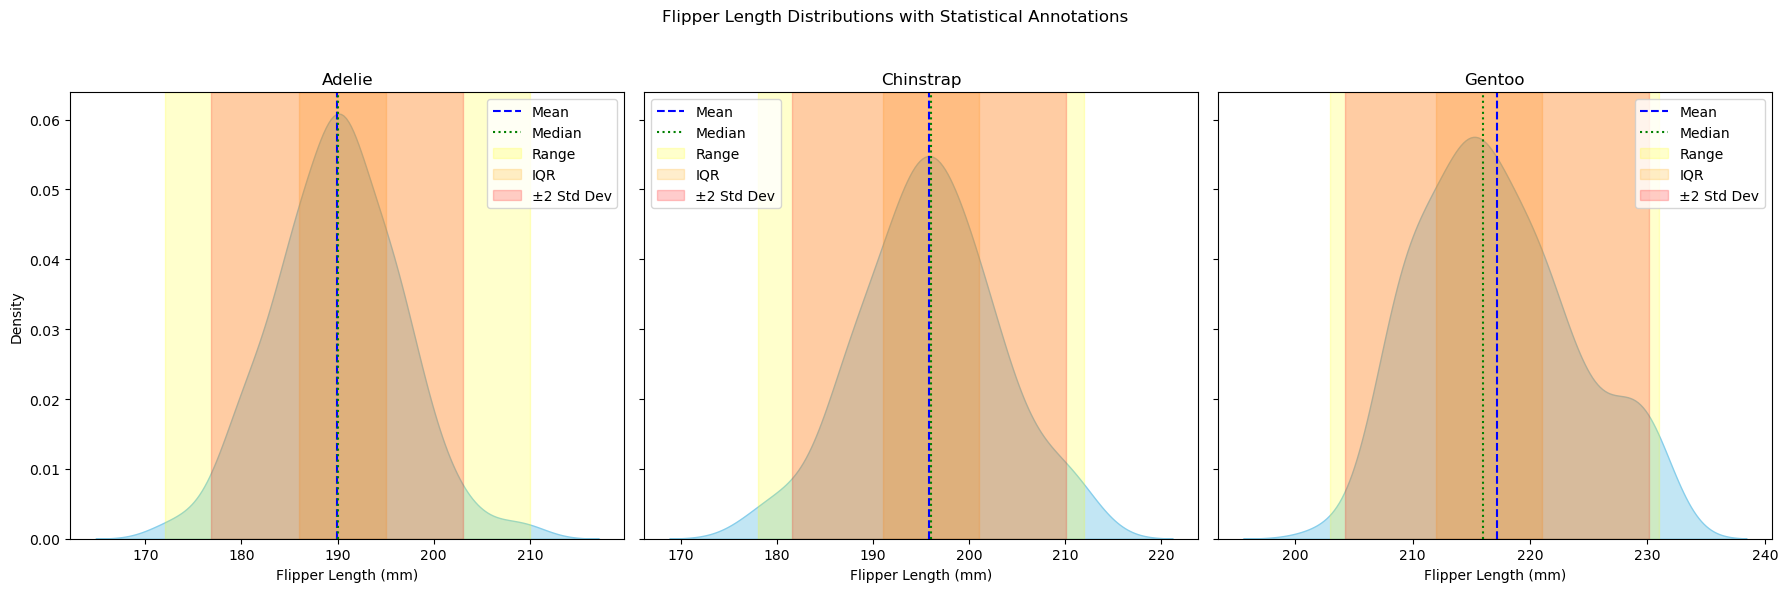

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing values in 'flipper_length_mm'
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Get unique species
species_list = penguins['species'].unique()

# Set up subplots: 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Flipper Length Distributions with Statistical Annotations')

# Loop through each species to create KDE plots and annotate statistics
for i, species in enumerate(species_list):
    # Subset data for each species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Compute key statistics
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    std_flipper = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)

    # Plot KDE for the current species
    ax = axes[i]
    sns.kdeplot(species_data, ax=ax, fill=True, color="skyblue", alpha=0.5)
    ax.set_title(f'{species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

    # Add vertical lines for mean and median
    ax.axvline(mean_flipper, color='blue', linestyle='--', label='Mean')
    ax.axvline(median_flipper, color='green', linestyle=':', label='Median')
    
    # Add shaded areas for range, IQR, and ±2 standard deviations
    ax.axvspan(min_flipper, max_flipper, color='yellow', alpha=0.2, label='Range')
    ax.axvspan(q1, q3, color='orange', alpha=0.2, label='IQR')
    ax.axvspan(mean_flipper - 2*std_flipper, mean_flipper + 2*std_flipper, color='red', alpha=0.2, label='±2 Std Dev')
    
    # Add legend
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

### Summary of Interactions with ChatGPT
- Seaborn KDE Plot with Statistical Annotations:

    - You then requested a similar visualization using Seaborn KDE plots and Matplotlib.
    - I provided a solution that used `sns.kdeplot()` to plot the KDE for `flipper_length_mm` for each species, with vertical lines marking the mean and median, and shaded regions for the range, IQR, and ±2 standard deviations.
    - Here, we used Matplotlib functions such as `axvline()` for vertical lines and `axvspan()` for shaded regions. The plots were organized in a row of three subplots using `plt.subplots()`.

[Chatbot transcript](https://chatgpt.com/share/66f1a9bf-34b4-800f-9b8e-90ba3f180427)

## Question 3

| Visualization Method      | Pros                                                                 | Cons                                                                  |
|---------------------------|----------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Box Plot**               | - Simple and quick summary of data spread and outliers               | - Lacks detailed information on the distribution's shape              |
|                           | - Highlights outliers explicitly                                     | - Does not show the frequency or density of values                    |
|                           | - Not sensitive to bin size or bandwidth                             | - No information on multiple peaks or modes                           |
| **Histogram**              | - Detailed frequency distribution visualization                      | - Appearance depends heavily on bin size                              |
|                           | - Shows shape of distribution clearly                                | - Can miss finer details if bin size is too large                     |
|                           | - Easy to create and interpret                                       | - Too small bins can result in a noisy or fragmented view             |
| **Kernel Density Estimator (KDE)** | - Provides a smooth, continuous estimate of the distribution's shape | - Result depends on the choice of bandwidth, which can be subjective  |
|                           | - Great for identifying subtle features like multiple peaks           | - Overly large bandwidth can oversmooth data and hide key features    |
|                           | - Less dependent on arbitrary binning like histograms                 | - Interpretation can be more complex for less experienced users       |




I prefer Kernel Density Estimators (KDEs) because they provide a smooth, continuous view of the data’s distribution without relying on arbitrary bins like histograms. KDEs make it easier to see subtle patterns and the overall shape of the data, which is particularly useful for continuous variables. Although bandwidth selection is crucial, KDEs give a clearer, more intuitive sense of the data’s underlying structure compared to the more segmented look of histograms or the summarized view in box plots. 

While I prefer KDE, I sometimes choose histograms or box plots when more detailed comparisons are needed. For example, when I want to identify outliers or understand the distribution within specific groups or categories, box plots offer a concise summary with clear indicators of median values, interquartile ranges, and potential outliers. Histograms, on the other hand, are useful for visualizing the frequency distribution of a variable, especially when I need to see how data is grouped into bins or spot clusters.

### Summary of Interactions with ChatGPT

User's Input:
- The user provided descriptions of three data distribution visualization methods: box plots, histograms, and kernel density estimators (KDE). The user mentioned that box plots are useful for summarizing data spread and identifying outliers but don’t show the full shape of the distribution. Histograms show more detailed frequency information but are sensitive to bin size, while KDEs smooth the data to estimate the probability distribution and provide a continuous shape, though the result depends on the choice of bandwidth.

Response Provided by AI:

- I agreed with the user's descriptions and provided additional context for each method, noting their strengths and limitations. I reiterated that each visualization method has specific trade-offs, depending on what aspect of the data needs to be analyzed.
- I also provided contrasting descriptions of the three methods, emphasizing their distinct functions (box plot for spread/outliers, histogram for frequency distribution, KDE for smooth distribution curves).
- Additionally, I supplied a pros and cons list for each method, outlining their advantages and potential drawbacks, including simplicity vs. detail, the impact of bin size or bandwidth, and ease of interpretation.

[Chatbot transcript](https://chatgpt.com/share/66f1b075-53c4-800f-8e4d-3ea481e1c598)

## Question 4


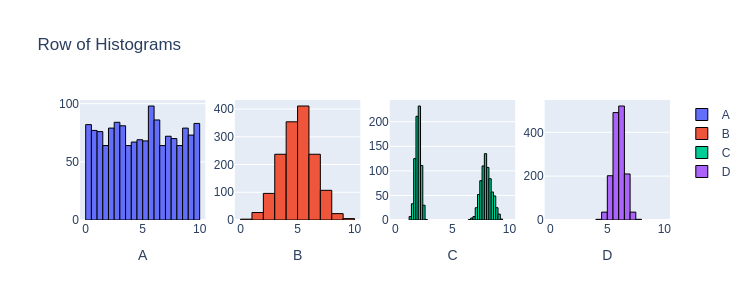

In [3]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [1]:
import numpy as np
from scipy import stats

# Data generation as provided above
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculating means and variances for each dataset
mean_data1 = np.mean(data1)
variance_data1 = np.var(data1, ddof=1)

mean_data2 = np.mean(data2)
variance_data2 = np.var(data2, ddof=1)

mean_data3 = np.mean(data3)
variance_data3 = np.var(data3, ddof=1)

mean_data4 = np.mean(data4)
variance_data4 = np.var(data4, ddof=1)

import pandas as pd

# Creating a DataFrame to organize the calculated mean and variance values
data_summary = {
    'Dataset': ['Data1', 'Data2', 'Data3', 'Data4'],
    'Mean': [mean_data1, mean_data2, mean_data3, mean_data4],
    'Variance': [variance_data1, variance_data2, variance_data3, variance_data4]
}

df_summary = pd.DataFrame(data_summary)
df_summary


,Dataset,Mean,Variance
0,Data1,5.078755,8.283985
1,Data2,5.054427,2.100506
2,Data3,4.996869,9.244601
3,Data4,5.996395,0.255242


**4.1**

Based on the table above:
- Data1, Data2, Data3 have similar mean values (around 4.9–5.0).
- Data1 and Data3 have similar high variances (8.28 and 9.24), meaning that the spread of their data points is quite similar.
    - Even though Data1 and Data3 have similar variances, their visual appearance is very different because variance only captures the magnitude of spread, not the shape of the distribution. The bimodal nature of Data3 makes it appear very different from the uniformly spread Data1, even though their variances are close.
    
Data1 (A) and Data3 (C) have similar mean and variance.

**4.2**

Data1, Data2, and Data3 have very similar means (around 4.9 to 5.0), so we focus on these.
- Their variances are quite different:
    - Data1 has a variance of 8.28 (high).
    - Data2 has a variance of 2.10 (moderate).
    - Data3 has a variance of 9.24 (high, but different in shape compared to Data1).
    
- Data1 (A) and Data2 (B) have very similar means (~5.07 and 5.05) but quite different variances (8.28 vs 2.10). This indicates that while their central tendencies are similar, Data1 has much more spread in the values compared to Data2.
- Data2 (B) and Data3 (C) have similar means (~5.05 and 4.997) but different variances (2.10 vs 9.24), with Data3 showing more spread in the values.

**4.3**

Data1 (A) and Data3 (C) have similar variances (8.30 and 9.13), but their means are only slightly different (4.92 vs 4.99). However none of the other datasets have drastically different means with similar variances. 

If we consider similar variances as the difference between two variances being less than 2, then data 2 (B) and data 4 (D) can also be considered to have similar variances, and their means are different by 1 (5.05 vs 5.996).

**4.4**

Data1 (A) and Data4 (D) have quite different means (5.07 vs 5.996) and quite different variances (8.28 vs 0.255).

Data3 (C) and Data4 (D) also have quite different means (4.996 vs 5.996) and quite different variances (9.24 vs 0.255).

After comparing these two pairs, Dats3 (C) and Data4 (D) have the largest difference in means (4.996 vs 5.996) and the largest difference in variances (9.24 vs 0.255).

### Summary of Interactions with ChatGPT

1. Initial Code and Dataset Generation:

- We started by generating four different datasets using NumPy and SciPy. These datasets included:
    - Data1: A uniformly distributed dataset between 0 and 10.
    - Data2: A normal distribution with a mean of 5 and standard deviation of 1.5.
    - Data3: A mixture of two normal distributions, one centered at 2 and the other at 8.
    - Data4: A normal distribution with a mean of 6 and standard deviation of 0.5.

2. Visualization:

- You created a row of histograms to visualize the distribution of the four datasets. The histograms helped visualize the shape and spread of each dataset.

3. Mean and Variance Calculations:

- We discussed how to compute the mean and variance for the datasets using NumPy and Pandas methods. The key calculations were:
    - `np.mean(df.col)` or `df.col.mean()` to calculate the mean.
    - `np.var(df.col, ddof=1)` or `df.col.var(ddof=1)` for the sample variance (using `ddof=1` for sample data).
    - `np.std(df.col, ddof=1)` or `df.col.std(ddof=1)` for the sample standard deviation.

4. Results of Mean and Variance:

- We computed the following values:

| Dataset | Mean     | Variance  |
|---------|----------|-----------|
| Data1   | 5.078755 | 8.283985  |
| Data2   | 5.054427 | 2.100506  |
| Data3   | 4.996869 | 9.244601  |
| Data4   | 5.996395 | 0.255242  |

5. Analysis of Similarities and Differences:

- We analyzed which datasets had:
    - Similar Means: Data1, Data2, and Data3 had very close mean values.
    - Different Variances: Despite having similar means, Data1, Data2, and Data3 had different variances, with Data1 and Data3 having much higher variances than Data2.
    - Similar Variances but Different Means: We found that Data1 and Data3 had similar variances, but their means were only slightly different.
    - Quite Different Means and Quite Different Variances: The largest differences were found between Data1 or Data3 and Data4. Specifically, Data1 and Data4 had a large gap in both mean and variance.

6. Final Summary:

- Datasets with similar means but different variances: Data1, Data2, and Data3.
- Datasets with similar variances but different means: Data1 and Data3 (although their means were close, the variances were more comparable).
- Datasets with quite different means and variances: Data1 and Data4, and also Data3 and Data4.


[Chatbot transcript](https://chatgpt.com/share/66f3207e-bbe8-800f-a574-c52abc270b61)

# "Post-lecture" HW

## Question 5

Mean: The average value of the data. It can be affected by extreme values (outliers).

Median: The middle value when the data is sorted. It is more robust to outliers and gives a better indication of the central tendency when the data is skewed.

Right Skewness (Positive Skewness): In a right-skewed distribution, the tail on the right (higher values) is longer. This usually results in the mean being greater than the median.

Left Skewness (Negative Skewness): In a left-skewed distribution, the tail on the left (lower values) is longer, causing the mean to be less than the median.

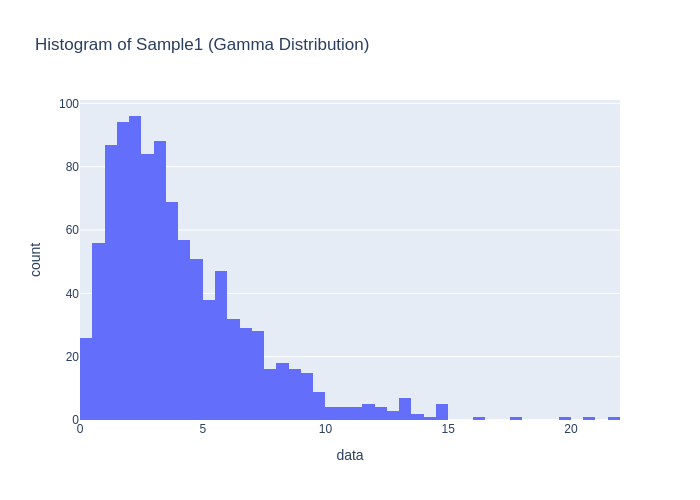

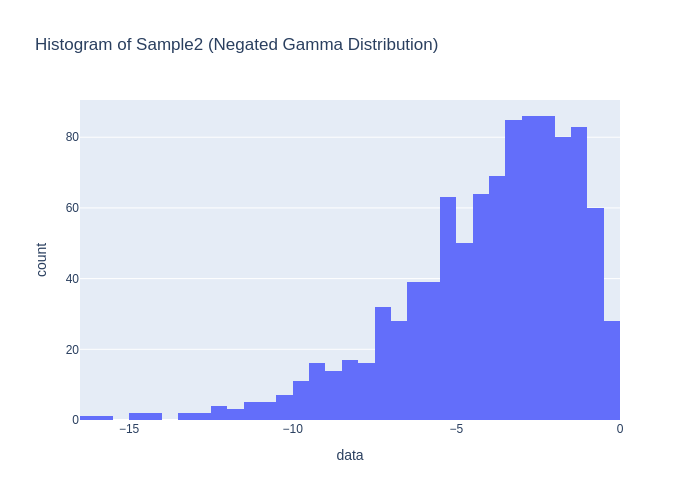

,Sample,Mean,Median
0,Sample 1,4.086905,3.269797
1,Sample 2,-4.037202,-3.449010


In [5]:
from scipy import stats 
# for statistical functions (specifically for generating gamma-distributed random variables).
import pandas as pd
import numpy as np # for numerical operations.
import plotly.express as px
import matplotlib.pyplot as plt
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
# This line generates a sample of 1000 random variables drawn from a gamma distribution,
# with shape parameter a=2 and scale parameter scale=2
# rvs(size=1000) generates the random values.

# Convert to DataFrame for visualization
df_sample1 = pd.DataFrame({'data': sample1})

fig1 = px.histogram(df_sample1, x="data", title='Histogram of Sample1 (Gamma Distribution)')
fig1.show(renderer="png")
# a histogram is created using plotly.express
# The sample is first converted into a DataFrame, and the histogram visualizes the distribution of sample1.

mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, 0.5)

mean_sample1, median_sample1
# calculates and returns the mean 

np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
# This generates another sample of 1000 random variables, but this time from a gamma distribution, which is then negated
# the result is a sample that follows a negative gamma distribution
df_sample2 = pd.DataFrame({'data': sample2})

# Create histogram for sample2
fig2 = px.histogram(df_sample2, x="data", title='Histogram of Sample2 (Negated Gamma Distribution)')
fig2.show(renderer="png")

# Calculate mean and median for sample2
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, 0.5)

mean_sample2, median_sample2

# Display results for comparison
results = pd.DataFrame({
    'Sample': ['Sample 1', 'Sample 2'],
    'Mean': [mean_sample1, mean_sample2],
    'Median': [median_sample1, median_sample2]
})

results

When you generate `sample1` from the gamma distribution:

- Expectations: The resulting distribution is likely to be right-skewed, meaning you would typically observe:
    - Mean > Median

For `sample2`, which is derived from `sample1` but negated:

- The negation will likely change the skewness to left-skewed. In this case, you would expect:
    - Mean < Median for this new distribution.

### Summary of Interactions with ChatGPT


Context: The user sought to understand the relationship between mean, median, and skewness (both right and left skewness) in relation to a given Python code snippet that generates samples from a gamma distribution.

Key Points Discussed:

1. Mean and Median:

- The mean is the average of the dataset, sensitive to outliers.
- The median is the middle value, more robust against outliers.

2. Skewness:

- Right Skewness (Positive Skew): In right-skewed distributions, the tail on the right is longer, often resulting in the mean being greater than the median.
- Left Skewness (Negative Skew): In left-skewed distributions, the tail on the left is longer, causing the mean to be less than the median.

3. Application to Code:

- The provided code generates a sample from a gamma distribution, calculates the mean and median, and visualizes the distribution.
- A second sample is derived by negating the first, which likely changes the skewness.

4. Notebook Code Sequence:

- A sequence of code cells was constructed to:
- Import necessary libraries.
- Generate and visualize two samples (one from the gamma distribution and one from the negated gamma distribution).
- Calculate and display the mean and median for both samples.
- Compare results to illustrate the relationship between mean, median, and skewness.

[Chatbot transcript](https://chatgpt.com/share/66f2e572-2da4-800f-af39-9331282fa036)

## Question 6

Basic statistics and structure of the dataset:

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,750.000000,750.000000,750.00000,395.000000,750.000000,260.000000,260.000000,637.000000,260.000000,637.000000,...,750.000000,260.000000,750.000000,260.000000,637.000000,750.000000,637.000000,637.000000,637.000000,637.000000
mean,2126.666667,113.685333,374.50000,10.612996,296.149333,127.096154,21.815385,3.409105,29.965385,0.603297,...,69.574667,15.780769,1.717333,6.530769,25.718995,11.398400,13.430141,7.954474,17.725275,8.819466
std,897.234043,9.956229,216.65064,7.286159,209.034366,127.875914,21.885199,4.972504,26.639209,1.193182,...,65.719590,9.419544,2.075374,6.307057,24.530455,11.119111,20.250714,21.220825,15.739473,10.229923
min,1000.000000,100.000000,0.00000,0.035274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,106.000000,187.25000,5.200000,150.000000,20.000000,3.750000,0.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.000000,3.000000,4.000000,0.000000,4.000000,0.000000
50%,2000.000000,111.000000,374.50000,10.158912,260.000000,100.000000,17.000000,0.200000,24.000000,0.000000,...,48.000000,15.000000,1.000000,5.000000,18.000000,9.000000,8.000000,0.000000,15.000000,6.000000
75%,3000.000000,123.000000,561.75000,16.000000,410.000000,200.000000,35.000000,6.000000,48.000000,0.500000,...,85.750000,20.000000,3.000000,10.000000,41.000000,16.000000,15.000000,6.000000,30.000000,15.000000
max,3000.000000,130.000000,749.00000,32.000000,1880.000000,1060.000000,182.000000,30.000000,102.000000,9.000000,...,340.000000,47.000000,21.000000,28.000000,128.000000,118.000000,170.000000,240.000000,70.000000,50.000000


The `df.describe()` function in pandas provides a summary of descriptive statistics for the numerical columns in your dataset. These statistics give an overview of the central tendencies (mean, median) and the spread (standard deviation, quartiles) for each nutritional factor.

In [9]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
missing_values

restaurant id                      0
category id                        0
item id                            0
serving size (oz)                355
calories                           0
calories from fat                490
total fat (g)                      0
total fat (% daily value)        490
saturated fat (g)                113
saturated fat (% daily value)    490
trans fat (g)                    113
cholesterol (mg)                 113
cholesterol (% daily value)      490
sodium (mg)                      113
sodium (% daily value)           490
carbohydrates (g)                  0
carbohydrates (% daily value)    490
dietary fiber (g)                  0
dietary fiber (% daily value)    490
sugars (g)                       113
protein (g)                        0
vitamin a (% daily value)        113
vitamin c (% daily value)        113
calcium (% daily value)          113
iron (% daily value)             113
dtype: int64

The function `df.isnull().sum()` in pandas is used to identify and summarize the number of missing values (nulls) in each column of the DataFrame. 

In [10]:
total_missing_values = df.isnull().sum().sum()

# Display the total number of missing values
print(f"Total missing values in the dataset: {total_missing_values}")

Total missing values in the dataset: 4802


In [11]:
rows, columns = df.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")

The DataFrame has 750 rows and 25 columns.


The `df.shape` function in pandas returns the dimensions of the DataFrame

In [13]:
calori = df['calories'].value_counts()
print(calori)

calories
0      30
200    21
290    21
180    21
190    20
       ..
810     1
930     1
700     1
990     1
580     1
Name: count, Length: 100, dtype: int64


The `df[].value_counts()` function in pandas is used to count the occurrences of unique values in a given column of a DataFrame.

Visualizations:

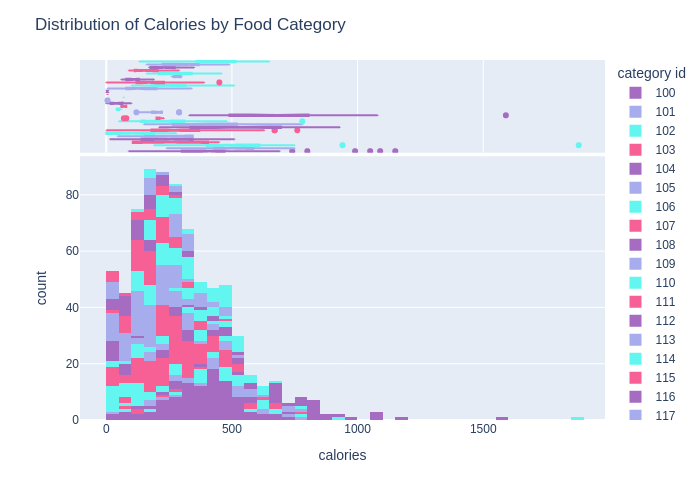

In [27]:
import plotly.express as px

# Create a histogram for calories with box plots as marginals
fig = px.histogram(df, 
                   x="calories", 
                   color="category id",  # Change this to whatever categorical variable you want
                   marginal="box",  # You can change this to "violin" if preferred
                   color_discrete_sequence=['#A56CC1', '#A6ACEC', '#63F5EF', '#F66095'],
                   hover_data=df.columns)  # Show all columns on hover

# Add a title
fig.update_layout(title="Distribution of Calories by Food Category")

# Show the plot
fig.show(renderer="png")


- This histogram will allow you to visualize how calorie counts are distributed across different food categories.
- The bars are color-coded based on the food category (using the `color` parameter).
- This allows you to visually differentiate how many items from each food category contribute to the overall distribution of calories.
- The box plots on the margins (top) provide a summary of the distribution of calorie values within each food category.

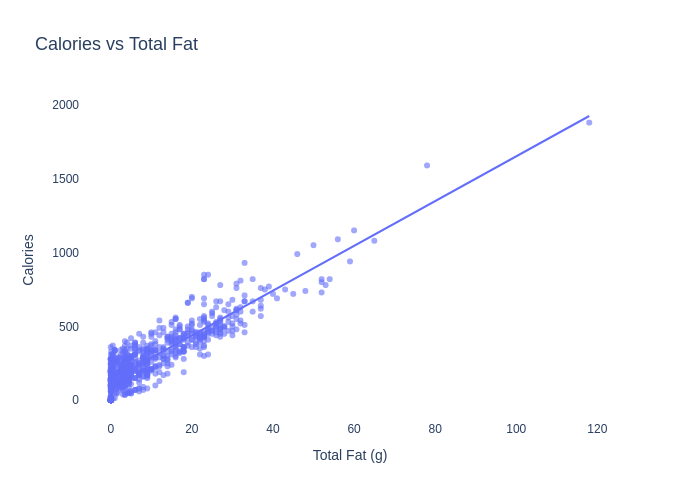

In [29]:
import pandas as pd
import plotly.express as px

# Ensure 'total fat (g)' and 'calories' columns are numeric
df['total fat (g)'] = pd.to_numeric(df['total fat (g)'], errors='coerce')  # Convert to numeric, set invalid values to NaN
df['calories'] = pd.to_numeric(df['calories'], errors='coerce')

# Drop rows with NaN values in 'total fat (g)' or 'calories'
df_clean = df.dropna(subset=['total fat (g)', 'calories'])

# Scatter plot for Calories vs Total Fat with improvements
fig = px.scatter(df_clean, 
                 x='total fat (g)', 
                 y='calories', 
                 title='Calories vs Total Fat',
                 labels={'total fat (g)': 'Total Fat (g)', 'calories': 'Calories'},
                 trendline='ols',  # Add a trendline to show the relationship
                 opacity=0.6,      # Adjust opacity for better visualization of overlapping points
                 size_max=8)       # Control marker size for better visibility

# Update layout for better readability
fig.update_layout(
    xaxis_title="Total Fat (g)", 
    yaxis_title="Calories",
    plot_bgcolor='rgba(0, 0, 0, 0)', # Set a transparent background for cleaner visuals
    title_font_size=18,
    xaxis=dict(showgrid=True),       # Add gridlines for readability
    yaxis=dict(showgrid=True),
)

fig.show(renderer="png")


- The trendline shows the general relationship between total fat and calories. It has a positive slope which suggests that as the total fat content increases, the calorie count also tends to increase. This indicates a possible correlation between higher fat content and higher calorie counts.
- The scatter points represent individual food items. The density of points in specific areas can provide insight into where most items fall concerning fat and calorie content.
- Many points cluster in the lower left quadrant (low fat, low calories), it suggests that there are many lower-calorie, low-fat options available.

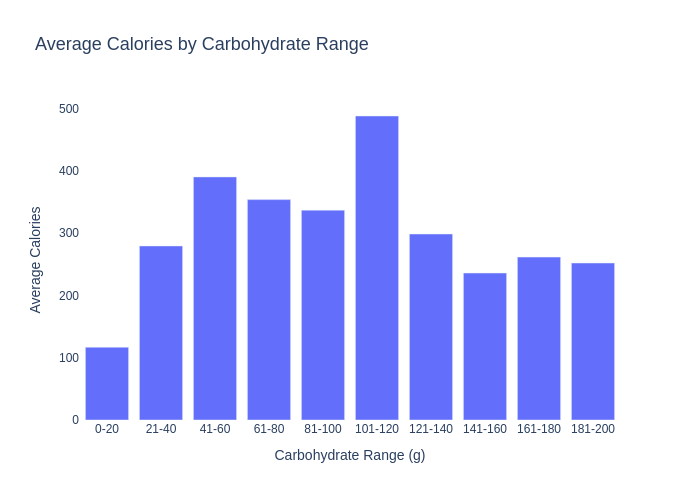

In [37]:
import pandas as pd
import plotly.express as px

# Ensure 'carbohydrates (g)' and 'calories' columns are numeric
df['carbohydrates (g)'] = pd.to_numeric(df['carbohydrates (g)'], errors='coerce')  # Convert to numeric
df['calories'] = pd.to_numeric(df['calories'], errors='coerce')

# Drop rows with NaN values in 'carbohydrates (g)' or 'calories'
df_clean = df.dropna(subset=['carbohydrates (g)', 'calories'])

# Create bins for carbohydrates
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]  # Adjust bins as needed
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200']
df_clean['carb_range'] = pd.cut(df_clean['carbohydrates (g)'], bins=bins, labels=labels)

# Calculate average calories for each carbohydrate range
avg_calories = df_clean.groupby('carb_range', observed=False)['calories'].mean().reset_index()

# Create a bar plot
fig = px.bar(avg_calories, x='carb_range', y='calories', title='Average Calories by Carbohydrate Range',
             labels={'carb_range': 'Carbohydrate Range (g)', 'calories': 'Average Calories'})

# Update layout for better readability
fig.update_layout(
    xaxis_title="Carbohydrate Range (g)", 
    yaxis_title="Average Calories",
    title_font_size=18,
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
    yaxis=dict(showgrid=True),
)

# Show the plot
fig.show(renderer='png')


- The bars fluctuate without a clear pattern which means there might be no strong correlation between carbohydrate content and calories.
    - The y-axis of the plot represents the average calories for each carbohydrate range. The height of each bar indicates the average calorie count associated with each specific carbohydrate range.
    - The bar plot illustrates the average calorie content within specified carbohydrate ranges. 


### Summary of Interactions with ChatGPT

1. Data Exploration:

- We began by loading a nutritional dataset and performed initial analyses using `pandas`.
- You requested summary statistics and visualizations to understand interesting aspects of the data, specifically focusing on fast food nutritional information.

2. Visualization Challenges:

- We encountered multiple errors while trying to create visualizations using Plotly, including issues with column names and data types.
- You expressed a desire for meaningful visualizations, leading to various adjustments in the figures to better represent the data.

3. Specific Visualization Requests:

- You requested figures comparing nutritional metrics like calories, total fat, and carbohydrates using different types of plots (scatter plots, box plots, and bar plots).
- We discussed the significance of each figure and how they represented relationships between the nutritional variables.

4. Addressing Warnings:

- A FutureWarning about the default behavior of the groupby method in pandas was noted, and we modified the code to include the observed parameter to suppress this warning.

5. Conclusions from Visualizations:

- After examining the bar plots, we discussed conclusions regarding the relationship between carbohydrate content and calorie counts, including trends in average calories across different carbohydrate ranges and dietary implications.

6. Final Visualization:

- You requested a figure to show the relationship between carbohydrates and calories without using a scatter plot. We created box plots and bar plots to fulfill this request, and I provided insights on how to interpret the results.

[Chatbot transcript](https://chatgpt.com/share/66f4d066-30e4-800f-9f67-f85767f002dc)

## Question 7


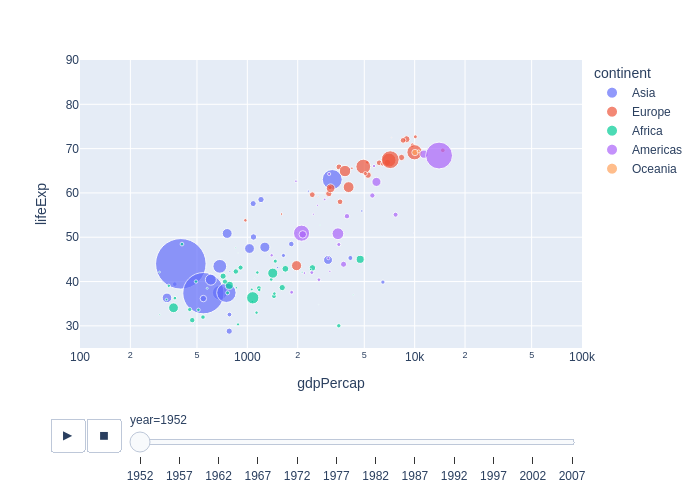

In [38]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png")

## Quetsion 8

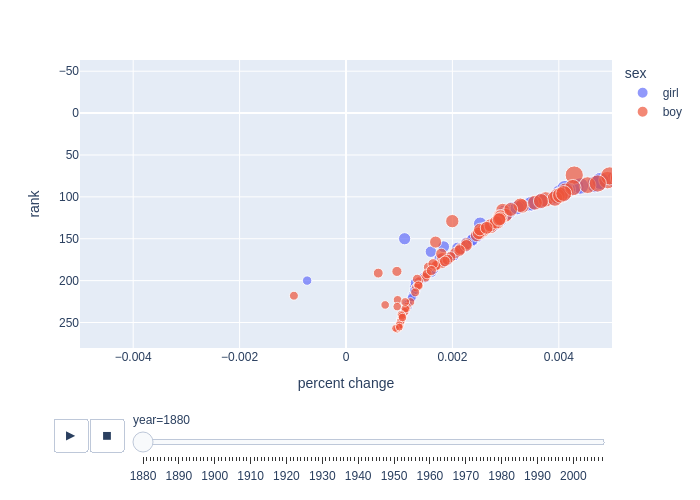

In [39]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top

fig.show(renderer="png")

## Question 9

Yes!